<a href="https://colab.research.google.com/github/mrstash101/Average-Return/blob/main/%E5%B9%B3%E5%9D%87%E3%83%AA%E3%82%BF%E3%83%BC%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
!pip install matplotlib-venn

# S&P 500 Average Return 2000-2019

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,1469.25,1478.000000,1350.140015,1394.459961,1394.459961,21494400000
2018-12-31,2790.50,2800.179932,2346.580078,2506.850098,2506.850098,83522570000


0.04334470534109167

0.04334470534109167

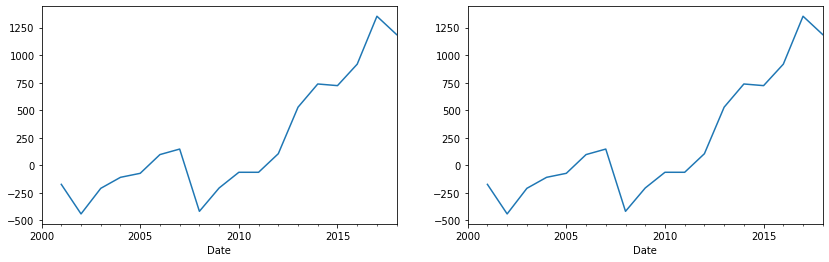

In [ ]:
def history(csvfile):
    df = pd.read_csv(csvfile, index_col='Date', parse_dates=True)
    df = df.dropna()
    df.index = df.index.to_period('M').to_timestamp('M')
    display(df.head(1).append(df.tail(1)))
    annual_price = df.resample('Y').agg({
        'Open': 'first',
        'Adj Close': 'last',
    })
    monthly_price = df[['Open', 'Adj Close']]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    annual_price['Adj Close'].diff().cumsum().plot(ax=axes[0])
    annual_price.loc['2000':'2019', 'Adj Close'].diff().cumsum().plot(ax=axes[1])
    return [
        r.pct_change(axis=1).dropna(axis=1).rename(columns={'Adj Close': 'value'}) 
        for r in (annual_price, monthly_price)
    ]

annual_return, monthly_return = history('./^GSPC.csv')
display(annual_return['value'].mean())
display(annual_return.loc['2000':'2019', 'value'].mean())
plt.show(block=True)

#NIKKEI Average Return 2000-2020

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,18937.449219,19187.609375,18937.449219,19002.859375,19002.859375,0.0
2019-12-31,23770.929688,23782.490234,23656.619141,23656.619141,23656.619141,41600.0


0.03522826848208645

0.03522826848208645

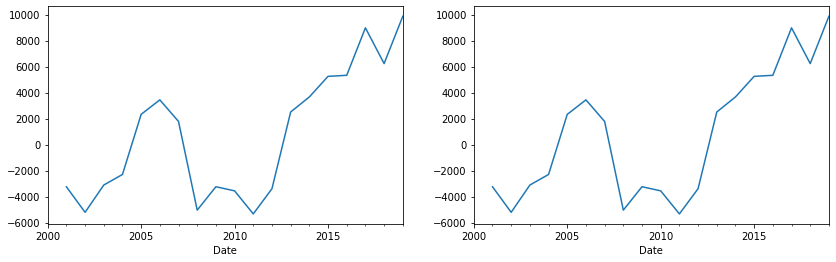

In [ ]:
def history(csvfile):
    df = pd.read_csv(csvfile, index_col='Date', parse_dates=True)
    df = df.dropna()
    df.index = df.index.to_period('M').to_timestamp('M')
    display(df.head(1).append(df.tail(1)))
    annual_price = df.resample('Y').agg({
        'Open': 'first',
        'Adj Close': 'last',
    })
    monthly_price = df[['Open', 'Adj Close']]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    annual_price['Adj Close'].diff().cumsum().plot(ax=axes[0])
    annual_price.loc['2000':'2020', 'Adj Close'].diff().cumsum().plot(ax=axes[1])
    return [
        r.pct_change(axis=1).dropna(axis=1).rename(columns={'Adj Close': 'value'}) 
        for r in (annual_price, monthly_price)
    ]

annual_return, monthly_return = history('./^N225.csv')
display(annual_return['value'].mean())
display(annual_return.loc['2000x':'2020', 'value'].mean())
plt.show(block=True)